In [1]:
import os
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import matplotlib.patches as patches
plt.style.use('seaborn-white')
from textwrap import wrap
import pylab as pl
import gc
import plotly.express as px
from collections import defaultdict
import plotly.io as pio



volume_topics = './20191007_topics.txt'

topic_words = './20191007_keys.txt'
topics = pd.read_csv(topic_words, sep = '\t', lineterminator = '\n', header=None)
# topics.drop(columns = 0, inplace = True)
topics.columns = ['topic_num','weight','words'] 
topics['topic_num'] = topics['topic_num'] + 1

words=[]
for i in range(0,60):
    words.append(topics.iloc[i,2].split(' ')) #convert string to list
    if (i==14):
        words[i][2] = str('differ')#ligature "ff" causes labeling problems in matplotlib
        words[i][4]= str('sufficient')
        words[i][5]= str('suffer')
        words[i] = ' '.join(words[i][:7])#slice first 9 words and convert back to string for wrapping
        
    else:
        words[i] = ' '.join(words[i][:7])#slice first 9 words and convert back to string for wrapping

# cross = pd.read_csv('./cross_topic_overlap.csv', sep =',', index_col=[0]) #load cross-topic data
# print('Dimension:' + str(cross.shape))
# cross.drop(columns=['HTID'], inplace=True)

data = pd.read_csv(volume_topics, sep = '\t', lineterminator = '\n', header=None)
data.drop(columns = 0, inplace = True)
data[1] = [string[string.rfind('/UK_data/')+9:-4] for string in data[1]]
data.columns = ['HTID'] + [i for i in range(1,61)]
print("Dimensions: " + str(data.shape))
htids = data['HTID']
metapath = './metadata.p'
metadata = pickle.load(open(metapath, 'rb'))

metadata['Year_rounded'] = pd.to_numeric(metadata['Year'])
metadata['Year'] = pd.to_numeric(metadata['Year'], downcast='signed')

def fix_htid(row):
    return row['HTID'].replace(":","+").replace("/", "=")

metadata['HTID'] = metadata.apply(fix_htid, axis=1)
df2 = pd.merge(data, metadata, on='HTID', how='inner').drop(columns = ['oclc', 'Year'])
data = pd.merge(data, metadata, on = 'HTID', how = 'inner').drop(columns = ['oclc', 'Year'])
# data['Year_rounded'] = df2['Year_rounded']
column_to_move = data.pop("HTID")

# insert column with insert(location, column_name, column_value)

data.insert(len(data.columns), "HTID", column_to_move)
# data = data.drop(columns=['HTID'])
data

C:\Users\Austin\AppData\Local\Temp\ipykernel_10940\3065897994.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


Dimensions: (166779, 61)


,1,2,3,4,5,6,7,8,9,10,...,53,54,55,56,57,58,59,60,Year_rounded,HTID
0,0.335310,0.000703,3.859994e-05,0.070415,0.094437,1.841183e-05,0.001295,0.000024,0.000154,2.281807e-05,...,0.004128,1.217153e-05,0.021920,5.930538e-03,8.631037e-06,0.000059,0.000046,0.035256,1898.0,uc1.b5568131
1,0.002840,0.001595,3.160480e-05,0.001070,0.071715,1.507521e-05,0.000041,0.000020,0.067670,1.868295e-05,...,0.012810,9.965785e-06,0.026869,3.071620e-03,1.020237e-02,0.001323,0.000038,0.000065,1832.0,uc1.$b135547
2,0.000017,0.000032,1.514681e-05,0.000024,0.000045,7.224896e-06,0.000019,0.000009,0.000060,8.953928e-06,...,0.000032,4.776170e-06,0.000051,6.244357e-06,2.812933e-03,0.000023,0.000140,0.000031,1896.0,hvd.32044106314859
3,0.000014,0.000003,3.943318e-03,0.013454,0.000005,3.564930e-02,0.000039,0.000075,0.000006,9.029192e-07,...,0.000028,4.816316e-07,0.000005,6.296845e-07,3.415332e-07,0.000002,0.068478,0.023605,1825.0,uc1.$b29323
4,0.000002,0.000004,9.407721e-04,0.000003,0.000006,9.914233e-07,0.000003,0.020569,0.033567,1.228687e-06,...,0.000004,6.554013e-07,0.000007,6.790642e-05,4.647562e-07,0.000020,0.000002,0.000004,1882.0,mdp.39015076816662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166775,0.000023,0.000678,1.974364e-05,0.000191,0.064386,1.686437e-04,0.024865,0.000490,0.148955,1.167131e-05,...,0.003863,6.225665e-06,0.000862,8.139426e-06,4.414725e-06,0.000190,0.000183,0.000041,1843.0,chi.090018182
166776,0.020714,0.000236,1.241825e-01,0.000008,0.000014,2.231040e-06,0.000044,0.016562,0.068709,2.764963e-06,...,0.136070,1.474876e-06,0.180247,1.928251e-06,1.045860e-06,0.008947,0.053230,0.015777,1874.0,hvd.32044089522510
166777,0.000134,0.019152,1.454623e-05,0.000258,0.001803,6.938422e-06,0.000136,0.000009,0.000644,8.598896e-06,...,0.002846,1.218974e-04,0.000166,5.996762e-06,3.252571e-06,0.044483,0.138092,0.000968,1808.0,uc1.31175035187601
166778,0.000068,0.008213,5.900777e-05,0.000095,0.005885,2.814618e-05,0.010069,0.000037,0.027360,3.488201e-05,...,0.001076,1.860663e-05,0.001626,2.432628e-05,1.319428e-05,0.043396,0.000070,0.004404,1857.0,aeu.ark+=13960=t09w1n868


In [2]:
df2

,HTID,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,Year_rounded
0,uc1.b5568131,0.335310,0.000703,3.859994e-05,0.070415,0.094437,1.841183e-05,0.001295,0.000024,0.000154,...,0.000063,0.004128,1.217153e-05,0.021920,5.930538e-03,8.631037e-06,0.000059,0.000046,0.035256,1898.0
1,uc1.$b135547,0.002840,0.001595,3.160480e-05,0.001070,0.071715,1.507521e-05,0.000041,0.000020,0.067670,...,0.037010,0.012810,9.965785e-06,0.026869,3.071620e-03,1.020237e-02,0.001323,0.000038,0.000065,1832.0
2,hvd.32044106314859,0.000017,0.000032,1.514681e-05,0.000024,0.000045,7.224896e-06,0.000019,0.000009,0.000060,...,0.000025,0.000032,4.776170e-06,0.000051,6.244357e-06,2.812933e-03,0.000023,0.000140,0.000031,1896.0
3,uc1.$b29323,0.000014,0.000003,3.943318e-03,0.013454,0.000005,3.564930e-02,0.000039,0.000075,0.000006,...,0.006445,0.000028,4.816316e-07,0.000005,6.296845e-07,3.415332e-07,0.000002,0.068478,0.023605,1825.0
4,mdp.39015076816662,0.000002,0.000004,9.407721e-04,0.000003,0.000006,9.914233e-07,0.000003,0.020569,0.033567,...,0.000020,0.000004,6.554013e-07,0.000007,6.790642e-05,4.647562e-07,0.000020,0.000002,0.000004,1882.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166775,chi.090018182,0.000023,0.000678,1.974364e-05,0.000191,0.064386,1.686437e-04,0.024865,0.000490,0.148955,...,0.004968,0.003863,6.225665e-06,0.000862,8.139426e-06,4.414725e-06,0.000190,0.000183,0.000041,1843.0
166776,hvd.32044089522510,0.020714,0.000236,1.241825e-01,0.000008,0.000014,2.231040e-06,0.000044,0.016562,0.068709,...,0.000196,0.136070,1.474876e-06,0.180247,1.928251e-06,1.045860e-06,0.008947,0.053230,0.015777,1874.0
166777,uc1.31175035187601,0.000134,0.019152,1.454623e-05,0.000258,0.001803,6.938422e-06,0.000136,0.000009,0.000644,...,0.008822,0.002846,1.218974e-04,0.000166,5.996762e-06,3.252571e-06,0.044483,0.138092,0.000968,1808.0
166778,aeu.ark+=13960=t09w1n868,0.000068,0.008213,5.900777e-05,0.000095,0.005885,2.814618e-05,0.010069,0.000037,0.027360,...,0.000097,0.001076,1.860663e-05,0.001626,2.432628e-05,1.319428e-05,0.043396,0.000070,0.004404,1857.0


In [3]:
data

,1,2,3,4,5,6,7,8,9,10,...,53,54,55,56,57,58,59,60,Year_rounded,HTID
0,0.335310,0.000703,3.859994e-05,0.070415,0.094437,1.841183e-05,0.001295,0.000024,0.000154,2.281807e-05,...,0.004128,1.217153e-05,0.021920,5.930538e-03,8.631037e-06,0.000059,0.000046,0.035256,1898.0,uc1.b5568131
1,0.002840,0.001595,3.160480e-05,0.001070,0.071715,1.507521e-05,0.000041,0.000020,0.067670,1.868295e-05,...,0.012810,9.965785e-06,0.026869,3.071620e-03,1.020237e-02,0.001323,0.000038,0.000065,1832.0,uc1.$b135547
2,0.000017,0.000032,1.514681e-05,0.000024,0.000045,7.224896e-06,0.000019,0.000009,0.000060,8.953928e-06,...,0.000032,4.776170e-06,0.000051,6.244357e-06,2.812933e-03,0.000023,0.000140,0.000031,1896.0,hvd.32044106314859
3,0.000014,0.000003,3.943318e-03,0.013454,0.000005,3.564930e-02,0.000039,0.000075,0.000006,9.029192e-07,...,0.000028,4.816316e-07,0.000005,6.296845e-07,3.415332e-07,0.000002,0.068478,0.023605,1825.0,uc1.$b29323
4,0.000002,0.000004,9.407721e-04,0.000003,0.000006,9.914233e-07,0.000003,0.020569,0.033567,1.228687e-06,...,0.000004,6.554013e-07,0.000007,6.790642e-05,4.647562e-07,0.000020,0.000002,0.000004,1882.0,mdp.39015076816662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166775,0.000023,0.000678,1.974364e-05,0.000191,0.064386,1.686437e-04,0.024865,0.000490,0.148955,1.167131e-05,...,0.003863,6.225665e-06,0.000862,8.139426e-06,4.414725e-06,0.000190,0.000183,0.000041,1843.0,chi.090018182
166776,0.020714,0.000236,1.241825e-01,0.000008,0.000014,2.231040e-06,0.000044,0.016562,0.068709,2.764963e-06,...,0.136070,1.474876e-06,0.180247,1.928251e-06,1.045860e-06,0.008947,0.053230,0.015777,1874.0,hvd.32044089522510
166777,0.000134,0.019152,1.454623e-05,0.000258,0.001803,6.938422e-06,0.000136,0.000009,0.000644,8.598896e-06,...,0.002846,1.218974e-04,0.000166,5.996762e-06,3.252571e-06,0.044483,0.138092,0.000968,1808.0,uc1.31175035187601
166778,0.000068,0.008213,5.900777e-05,0.000095,0.005885,2.814618e-05,0.010069,0.000037,0.027360,3.488201e-05,...,0.001076,1.860663e-05,0.001626,2.432628e-05,1.319428e-05,0.043396,0.000070,0.004404,1857.0,aeu.ark+=13960=t09w1n868


## Fix dates to be compatible with moving_totals

In [4]:
# for ind,row in data.iterrows():
#     if row['Year_rounded'] > 1890:
#         row['Year_rounded'] = 1890
#     elif row['Year_rounded'] < 1510:
#         row['Year_rounded'] = 1510
        
        
for ind,row in data.iterrows():
    if row['Year_rounded'] > 1890:
        data.at[ind, 'Year_rounded'] = 1890
    elif row['Year_rounded'] < 1510:
        data.at[ind, 'Year_rounded'] = 1510


In [14]:
data

,1,2,3,4,5,6,7,8,9,10,...,53,54,55,56,57,58,59,60,Year_rounded,HTID
0,0.335310,0.000703,3.859994e-05,0.070415,0.094437,1.841183e-05,0.001295,0.000024,0.000154,2.281807e-05,...,0.004128,1.217153e-05,0.021920,5.930538e-03,8.631037e-06,0.000059,0.000046,0.035256,1890.0,uc1.b5568131
1,0.002840,0.001595,3.160480e-05,0.001070,0.071715,1.507521e-05,0.000041,0.000020,0.067670,1.868295e-05,...,0.012810,9.965785e-06,0.026869,3.071620e-03,1.020237e-02,0.001323,0.000038,0.000065,1832.0,uc1.$b135547
2,0.000017,0.000032,1.514681e-05,0.000024,0.000045,7.224896e-06,0.000019,0.000009,0.000060,8.953928e-06,...,0.000032,4.776170e-06,0.000051,6.244357e-06,2.812933e-03,0.000023,0.000140,0.000031,1890.0,hvd.32044106314859
3,0.000014,0.000003,3.943318e-03,0.013454,0.000005,3.564930e-02,0.000039,0.000075,0.000006,9.029192e-07,...,0.000028,4.816316e-07,0.000005,6.296845e-07,3.415332e-07,0.000002,0.068478,0.023605,1825.0,uc1.$b29323
4,0.000002,0.000004,9.407721e-04,0.000003,0.000006,9.914233e-07,0.000003,0.020569,0.033567,1.228687e-06,...,0.000004,6.554013e-07,0.000007,6.790642e-05,4.647562e-07,0.000020,0.000002,0.000004,1882.0,mdp.39015076816662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166775,0.000023,0.000678,1.974364e-05,0.000191,0.064386,1.686437e-04,0.024865,0.000490,0.148955,1.167131e-05,...,0.003863,6.225665e-06,0.000862,8.139426e-06,4.414725e-06,0.000190,0.000183,0.000041,1843.0,chi.090018182
166776,0.020714,0.000236,1.241825e-01,0.000008,0.000014,2.231040e-06,0.000044,0.016562,0.068709,2.764963e-06,...,0.136070,1.474876e-06,0.180247,1.928251e-06,1.045860e-06,0.008947,0.053230,0.015777,1874.0,hvd.32044089522510
166777,0.000134,0.019152,1.454623e-05,0.000258,0.001803,6.938422e-06,0.000136,0.000009,0.000644,8.598896e-06,...,0.002846,1.218974e-04,0.000166,5.996762e-06,3.252571e-06,0.044483,0.138092,0.000968,1808.0,uc1.31175035187601
166778,0.000068,0.008213,5.900777e-05,0.000095,0.005885,2.814618e-05,0.010069,0.000037,0.027360,3.488201e-05,...,0.001076,1.860663e-05,0.001626,2.432628e-05,1.319428e-05,0.043396,0.000070,0.004404,1857.0,aeu.ark+=13960=t09w1n868


In [5]:
cluster_rel = [4,12,52]
cluster_sci = [7,8,41]
cluster_pol = [33,34,47]

In [6]:
with open('moving_totals.p', 'rb') as fp:
    moving_totals = pickle.load(fp)

In [7]:
moving_totals['1550']

,Religion,Science,Political Economy,Total,Topic,Topic Num,Color
0,0.000026,4.522887e-08,7.771671e-06,0.000034,1 - paint pictur artist music engrav painter c...,1,Political Economy
1,0.000005,4.437379e-08,1.291504e-06,0.000007,2 - town road church build built river stone,2,Political Economy
2,0.000268,8.676337e-07,6.237279e-05,0.000331,3 - franc pari french loui madam duke count,3,Political Economy
3,0.000707,8.746708e-07,1.006739e-04,0.000808,4 - church christian christ bishop holi paul d...,4,Religion
4,0.001800,9.530148e-07,1.286890e-04,0.001929,5 - love heart beauti soul sweet dark night,5,Religion
5,0.000002,2.729652e-08,1.088766e-07,0.000002,6 - india chines china nativ indian bengal govern,6,Political Economy
6,0.000009,8.428712e-08,8.253338e-07,0.000010,7 - fig water iron engin pressur steam electr,7,Science
7,0.000010,5.710329e-08,6.553257e-07,0.000010,8 - acid solut heat carbon water sulphur iron,8,Science
8,0.000015,8.573933e-08,2.144131e-06,0.000017,9 - exist refer period similar consist occur c...,9,Political Economy
9,0.000062,8.366324e-07,1.439827e-05,0.000077,10 - vol lond fol folio calf copi pari,10,Religion


In [8]:
years=[]
for year in range(1510,1891):
    years.append(year)

In [9]:
moving_shares = {}
for year in years:
    moving_shares[str(year)] = moving_totals[str(year)].copy()
    moving_shares[str(year)] = moving_shares[str(year)][['Religion','Science','Political Economy']].div(moving_shares[str(year)]['Total'], axis=0)
    moving_shares[str(year)]['Topic'] = moving_totals[str(year)]['Topic'] #FOR TRIANGLES: Add 'Topic Num' and 'Color'

In [10]:
moving_shares['1550']

,Religion,Science,Political Economy,Topic
0,0.769908,0.001331,0.228760,1 - paint pictur artist music engrav painter c...
1,0.799548,0.006658,0.193793,2 - town road church build built river stone
2,0.808955,0.002621,0.188424,3 - franc pari french loui madam duke count
3,0.874334,0.001082,0.124584,4 - church christian christ bishop holi paul d...
4,0.932808,0.000494,0.066698,5 - love heart beauti soul sweet dark night
5,0.928216,0.014389,0.057395,6 - india chines china nativ indian bengal govern
6,0.907119,0.008607,0.084275,7 - fig water iron engin pressur steam electr
7,0.930274,0.005589,0.064137,8 - acid solut heat carbon water sulphur iron
8,0.868286,0.005064,0.126650,9 - exist refer period similar consist occur c...
9,0.802223,0.010861,0.186916,10 - vol lond fol folio calf copi pari


In [21]:
#Export moving_shares
with open('meta_weights.p', 'wb') as fp:
    pickle.dump(moving_shares, fp, protocol=pickle.HIGHEST_PROTOCOL)

## **Uncomment and run if you need to find category weights for volumes

In [26]:
pol_vol = []
sci_vol = []
rel_vol = []
htid = []
for ind,row in data.iterrows():
    # print(ind)
    pol_score = []
    rel_score = []
    sci_score = []
    for i in range(1,61):
        pol_score.append(float(moving_shares[str(int(row['Year_rounded']))].iloc[i-1,2]) * row[i])
        rel_score.append(float(moving_shares[str(int(row['Year_rounded']))].iloc[i-1,0]) * row[i])
        sci_score.append(float(moving_shares[str(int(row['Year_rounded']))].iloc[i-1,1]) * row[i])
    pol_vol.append(sum(pol_score))
    rel_vol.append(sum(rel_score))
    sci_vol.append(sum(sci_score))
    htid.append(row['HTID'])
u = zip(rel_vol,sci_vol,pol_vol, htid)
volume_weights = pd.DataFrame(u, columns=['Religion','Science','Politics', 'HTID'])
volume_weights

volume_weights.to_csv('volume_weights.csv')
    

In [24]:
volume_weights

,Religion,Science,Political Economy,HTID
0,0.333297,0.163841,0.502862,uc1.b5568131
1,0.418514,0.105182,0.476304,uc1.$b135547
2,0.065579,0.629992,0.304428,hvd.32044106314859
3,0.394566,0.038090,0.567344,uc1.$b29323
4,0.028397,0.596213,0.375391,mdp.39015076816662
...,...,...,...,...
166775,0.431160,0.192921,0.375918,chi.090018182
166776,0.265314,0.150630,0.584056,hvd.32044089522510
166777,0.161262,0.179909,0.658829,uc1.31175035187601
166778,0.131229,0.142632,0.726139,aeu.ark+=13960=t09w1n868


In [17]:
data

,1,2,3,4,5,6,7,8,9,10,...,53,54,55,56,57,58,59,60,Year_rounded,HTID
0,0.335310,0.000703,3.859994e-05,0.070415,0.094437,1.841183e-05,0.001295,0.000024,0.000154,2.281807e-05,...,0.004128,1.217153e-05,0.021920,5.930538e-03,8.631037e-06,0.000059,0.000046,0.035256,1890.0,uc1.b5568131
1,0.002840,0.001595,3.160480e-05,0.001070,0.071715,1.507521e-05,0.000041,0.000020,0.067670,1.868295e-05,...,0.012810,9.965785e-06,0.026869,3.071620e-03,1.020237e-02,0.001323,0.000038,0.000065,1832.0,uc1.$b135547
2,0.000017,0.000032,1.514681e-05,0.000024,0.000045,7.224896e-06,0.000019,0.000009,0.000060,8.953928e-06,...,0.000032,4.776170e-06,0.000051,6.244357e-06,2.812933e-03,0.000023,0.000140,0.000031,1890.0,hvd.32044106314859
3,0.000014,0.000003,3.943318e-03,0.013454,0.000005,3.564930e-02,0.000039,0.000075,0.000006,9.029192e-07,...,0.000028,4.816316e-07,0.000005,6.296845e-07,3.415332e-07,0.000002,0.068478,0.023605,1825.0,uc1.$b29323
4,0.000002,0.000004,9.407721e-04,0.000003,0.000006,9.914233e-07,0.000003,0.020569,0.033567,1.228687e-06,...,0.000004,6.554013e-07,0.000007,6.790642e-05,4.647562e-07,0.000020,0.000002,0.000004,1882.0,mdp.39015076816662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166775,0.000023,0.000678,1.974364e-05,0.000191,0.064386,1.686437e-04,0.024865,0.000490,0.148955,1.167131e-05,...,0.003863,6.225665e-06,0.000862,8.139426e-06,4.414725e-06,0.000190,0.000183,0.000041,1843.0,chi.090018182
166776,0.020714,0.000236,1.241825e-01,0.000008,0.000014,2.231040e-06,0.000044,0.016562,0.068709,2.764963e-06,...,0.136070,1.474876e-06,0.180247,1.928251e-06,1.045860e-06,0.008947,0.053230,0.015777,1874.0,hvd.32044089522510
166777,0.000134,0.019152,1.454623e-05,0.000258,0.001803,6.938422e-06,0.000136,0.000009,0.000644,8.598896e-06,...,0.002846,1.218974e-04,0.000166,5.996762e-06,3.252571e-06,0.044483,0.138092,0.000968,1808.0,uc1.31175035187601
166778,0.000068,0.008213,5.900777e-05,0.000095,0.005885,2.814618e-05,0.010069,0.000037,0.027360,3.488201e-05,...,0.001076,1.860663e-05,0.001626,2.432628e-05,1.319428e-05,0.043396,0.000070,0.004404,1857.0,aeu.ark+=13960=t09w1n868


In [11]:
volume_weights = pd.read_csv('volume_weights.csv', index_col = [0])
volume_weights

,Religion,Science,Politics,HTID
0,0.333297,0.163841,0.502862,uc1.b5568131
1,0.418514,0.105182,0.476304,uc1.$b135547
2,0.065579,0.629992,0.304428,hvd.32044106314859
3,0.394566,0.038090,0.567344,uc1.$b29323
4,0.028397,0.596213,0.375391,mdp.39015076816662
...,...,...,...,...
166775,0.431160,0.192921,0.375918,chi.090018182
166776,0.265314,0.150630,0.584056,hvd.32044089522510
166777,0.161262,0.179909,0.658829,uc1.31175035187601
166778,0.131229,0.142632,0.726139,aeu.ark+=13960=t09w1n868


In [12]:
volume_weights = pd.merge(volume_weights, metadata, on = 'HTID', how = 'inner').drop(columns = ['oclc', 'Year'])
volume_weights

,Religion,Science,Politics,HTID,Year_rounded
0,0.333297,0.163841,0.502862,uc1.b5568131,1898.0
1,0.418514,0.105182,0.476304,uc1.$b135547,1832.0
2,0.065579,0.629992,0.304428,hvd.32044106314859,1896.0
3,0.394566,0.038090,0.567344,uc1.$b29323,1825.0
4,0.028397,0.596213,0.375391,mdp.39015076816662,1882.0
...,...,...,...,...,...
166777,0.431160,0.192921,0.375918,chi.090018182,1843.0
166778,0.265314,0.150630,0.584056,hvd.32044089522510,1874.0
166779,0.161262,0.179909,0.658829,uc1.31175035187601,1808.0
166780,0.131229,0.142632,0.726139,aeu.ark+=13960=t09w1n868,1857.0


In [6]:
volume_weights[volume_weights['Year_rounded'] == 1550]

,Religion,Science,Politics,HTID,Year_rounded
74315,0.029192,0.896423,0.074385,umn.319510020982378,1550.0
78720,0.026167,0.891376,0.082456,ien.35556006982995,1550.0
114616,0.027115,0.897565,0.075320,uc1.31158002486263,1550.0
132586,0.023827,0.885720,0.090453,uc1.31822038199956,1550.0
158659,0.036239,0.899979,0.063782,nnc1.cu56496583,1550.0


In [ ]:
# pol_vol = []
# sci_vol = []
# rel_vol = []
# htid = []
# for ind, row in data.iterrows():
#     topic_scores = moving_shares[str(int(row['Year_rounded']))].drop(columns = ['Topic'])
#     volume = row[

In [30]:
volume_weights = pd.merge(volume_weights, metadata, on = "HTID", how = 'inner').drop(columns = ['oclc', 'Year'])
volume_weights

,Religion,Science,Politics,HTID,Year_rounded
0,0.333297,0.163841,0.502862,uc1.b5568131,1898.0
1,0.418514,0.105182,0.476304,uc1.$b135547,1832.0
2,0.065579,0.629992,0.304428,hvd.32044106314859,1896.0
3,0.394566,0.038090,0.567344,uc1.$b29323,1825.0
4,0.028397,0.596213,0.375391,mdp.39015076816662,1882.0
...,...,...,...,...,...
166777,0.431160,0.192921,0.375918,chi.090018182,1843.0
166778,0.265314,0.150630,0.584056,hvd.32044089522510,1874.0
166779,0.161262,0.179909,0.658829,uc1.31175035187601,1808.0
166780,0.131229,0.142632,0.726139,aeu.ark+=13960=t09w1n868,1857.0


In [13]:
volumes_sci = volume_weights[(volume_weights['Science'] > volume_weights['Religion']) & (volume_weights['Science'] > volume_weights['Politics'])]
volumes_pol = volume_weights[(volume_weights['Politics'] > volume_weights['Religion']) & (volume_weights['Science'] < volume_weights['Politics'])]
volumes_rel = volume_weights[(volume_weights['Science'] < volume_weights['Religion']) & (volume_weights['Religion'] > volume_weights['Politics'])]



In [14]:
# volumes_sci['Religion'].sum()/
len(volumes_rel['Science'])

48788

In [15]:
sci_sci = {}
sci_pol = {}
sci_rel = {}
sci_vol = {}
for year in years:
    d = volumes_sci[(volumes_sci['Year_rounded'] >= (year-10)) & (volumes_sci['Year_rounded'] <= (year+10))].drop(columns=['Year_rounded'])
#     d = volumes_sci[(volumes_sci['Year_rounded'] >= (year-20)) & (volumes_sci['Year_rounded'] <= (year+20))].drop(columns=['Year_rounded'])
    r = d['Religion'].sum()
    s = d['Science'].sum()
    p = d['Politics'].sum()
    N = len(d['Science']) #Will be same for all three categories
    if N > 0:
        sci_sci[year] = s/N
        sci_rel[year] = r/N
        sci_pol[year] = p/N
        sci_vol[year] = N
    else:
        sci_sci[year] = np.NaN
        sci_rel[year] = np.NaN
        sci_pol[year] = np.NaN
        sci_vol[year] = np.NaN
    

In [16]:
pol_sci = {}
pol_pol = {}
pol_rel = {}
pol_vol = {}
for year in years:
    d = volumes_pol[(volumes_pol['Year_rounded'] >= (year-10)) & (volumes_pol['Year_rounded'] <= (year+10))].drop(columns=['Year_rounded'])
#     d = volumes_pol[(volumes_pol['Year_rounded'] >= (year-20)) & (volumes_pol['Year_rounded'] <= (year+20))].drop(columns=['Year_rounded'])
    r = d['Religion'].sum()
    s = d['Science'].sum()
    p = d['Politics'].sum()
    N = len(d['Science']) #Will be same for all three categories
    if N > 0:
        pol_sci[year] = s/N
        pol_rel[year] = r/N
        pol_pol[year] = p/N
        pol_vol[year] = N
    else:
        pol_sci[year] = np.NaN
        pol_rel[year] = np.NaN
        pol_pol[year] = np.NaN
        pol_vol[year] = np.NaN

In [17]:
rel_sci = {}
rel_pol = {}
rel_rel = {}
rel_vol = {}
for year in years:
    d = volumes_rel[(volumes_rel['Year_rounded'] >= (year-10)) & (volumes_rel['Year_rounded'] <= (year+10))].drop(columns=['Year_rounded'])
#     d = volumes_rel[(volumes_rel['Year_rounded'] >= (year-20)) & (volumes_rel['Year_rounded'] <= (year+20))].drop(columns=['Year_rounded'])

    r = d['Religion'].sum()
    s = d['Science'].sum()
    p = d['Politics'].sum()
    N = len(d['Science']) #Will be same for all three categories
    if N > 0:
        rel_sci[year] = s/N
        rel_rel[year] = r/N
        rel_pol[year] = p/N 
        rel_vol[year] = N
    else:
        rel_sci[year] = np.NaN
        rel_rel[year] = np.NaN
        rel_pol[year] = np.NaN
        rel_vol[year] = np.NaN

In [18]:
sci_time = pd.DataFrame({'Science':pd.Series(sci_sci), 'Religion':pd.Series(sci_rel), 'Politics':pd.Series(sci_pol), 'Volumes':pd.Series(sci_vol)})
pol_time = pd.DataFrame({'Science':pd.Series(pol_sci), 'Religion':pd.Series(pol_rel), 'Politics':pd.Series(pol_pol), 'Volumes':pd.Series(pol_vol)})
rel_time = pd.DataFrame({'Science':pd.Series(rel_sci), 'Religion':pd.Series(rel_rel), 'Politics':pd.Series(rel_pol), 'Volumes':pd.Series(rel_vol)})


In [42]:
rel_vol

{1510: nan,
 1511: nan,
 1512: nan,
 1513: nan,
 1514: nan,
 1515: nan,
 1516: nan,
 1517: nan,
 1518: nan,
 1519: nan,
 1520: nan,
 1521: nan,
 1522: nan,
 1523: nan,
 1524: nan,
 1525: nan,
 1526: nan,
 1527: nan,
 1528: nan,
 1529: nan,
 1530: nan,
 1531: nan,
 1532: nan,
 1533: nan,
 1534: nan,
 1535: nan,
 1536: nan,
 1537: nan,
 1538: nan,
 1539: nan,
 1540: nan,
 1541: nan,
 1542: nan,
 1543: nan,
 1544: nan,
 1545: nan,
 1546: nan,
 1547: nan,
 1548: nan,
 1549: nan,
 1550: nan,
 1551: nan,
 1552: nan,
 1553: nan,
 1554: nan,
 1555: nan,
 1556: nan,
 1557: nan,
 1558: nan,
 1559: nan,
 1560: nan,
 1561: nan,
 1562: nan,
 1563: nan,
 1564: nan,
 1565: nan,
 1566: nan,
 1567: nan,
 1568: nan,
 1569: nan,
 1570: nan,
 1571: nan,
 1572: nan,
 1573: nan,
 1574: nan,
 1575: nan,
 1576: nan,
 1577: nan,
 1578: nan,
 1579: nan,
 1580: nan,
 1581: nan,
 1582: nan,
 1583: nan,
 1584: nan,
 1585: nan,
 1586: nan,
 1587: nan,
 1588: nan,
 1589: nan,
 1590: nan,
 1591: nan,
 1592: nan,
 159

In [19]:
sci_time = sci_time.transpose()
pol_time = pol_time.transpose()
rel_time = rel_time.transpose()

In [37]:
pol_time

,1510,1511,1512,1513,1514,1515,1516,1517,1518,1519,...,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890
Science,0.124481,0.118228,0.125722,0.131610,0.131610,0.130686,0.130686,0.130686,0.130686,0.130686,...,0.155826,0.155887,0.156109,0.155940,0.155845,0.155915,0.155871,0.156019,0.155850,0.155641
Religion,0.319695,0.312397,0.316085,0.319557,0.319557,0.321257,0.321257,0.321257,0.321257,0.321257,...,0.276659,0.276189,0.275580,0.275013,0.274427,0.273773,0.273470,0.272657,0.272088,0.272210
Politics,0.555824,0.569375,0.558193,0.548833,0.548833,0.548057,0.548057,0.548057,0.548057,0.548057,...,0.567515,0.567924,0.568311,0.569046,0.569729,0.570312,0.570658,0.571324,0.572062,0.572149
Volumes,7.000000,6.000000,7.000000,8.000000,8.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,31074.000000,32249.000000,33424.000000,34373.000000,35471.000000,36460.000000,37381.000000,38417.000000,39455.000000,38231.000000


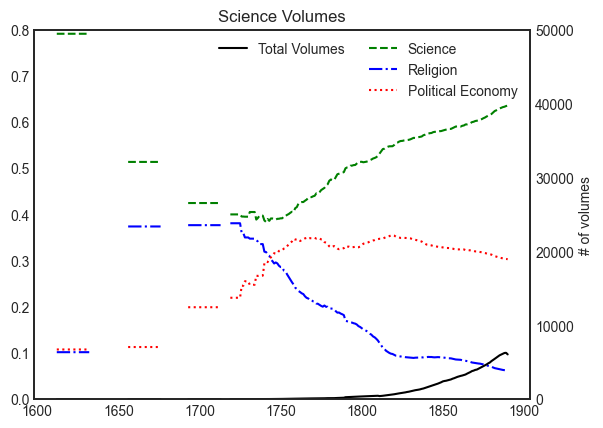

In [20]:

fig, (ax1) = plt.subplots(1,1)
ax1.plot(sci_time.columns, sci_time.iloc[0], color='g', label = 'Science', linestyle = 'dashed')
ax1.plot(sci_time.columns, sci_time.iloc[1], color='b', label = 'Religion', linestyle = 'dashdot')
ax1.plot(sci_time.columns, sci_time.iloc[2], color='r', label = 'Political Economy', linestyle = 'dotted')
ax1.legend(loc='upper right')
plt.ylim([0,0.8])
ax1.title.set_text('Science Volumes')

ax2 = ax1.twinx()
ax2.set_ylabel('# of volumes')
ax2.plot(sci_time.columns, sci_time.iloc[3], color='black', label = 'Total Volumes')
ax2.legend(loc='upper center')
plt.ylim([0,50000])
fig.savefig('./Volumes/Science.png', dpi = 200)
# plt.savefig('./Volumes_Ali/Science.eps', format='eps')

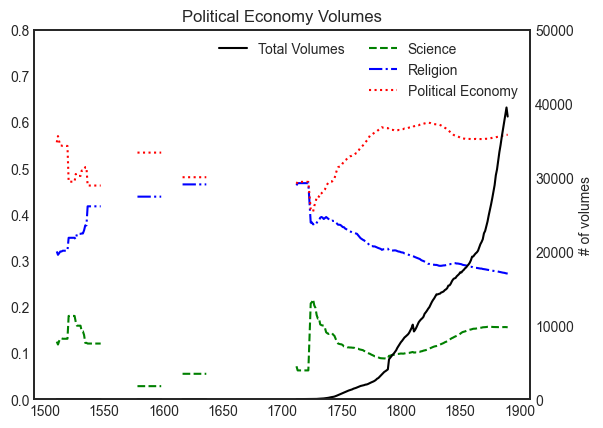

In [21]:
fig, (ax1) = plt.subplots(1,1)
ax1.plot(pol_time.columns, pol_time.iloc[0], color='g', label = 'Science', linestyle = 'dashed')
ax1.plot(pol_time.columns, pol_time.iloc[1], color='b', label = 'Religion', linestyle = 'dashdot')
ax1.plot(pol_time.columns, pol_time.iloc[2], color='r', label = 'Political Economy', linestyle = 'dotted')
ax1.legend(loc='upper right')
plt.ylim([0,0.8])
ax1.title.set_text('Political Economy Volumes')

ax2 = ax1.twinx()
ax2.set_ylabel('# of volumes')
ax2.plot(pol_time.columns, pol_time.iloc[3], color='black', label = 'Total Volumes')
ax2.legend(loc='upper center')
plt.ylim([0,50000])
fig.savefig('./Volumes/Political_Economy.png', dpi = 200)
# plt.savefig('./Volumes_Ali/Politics.eps', format='eps')

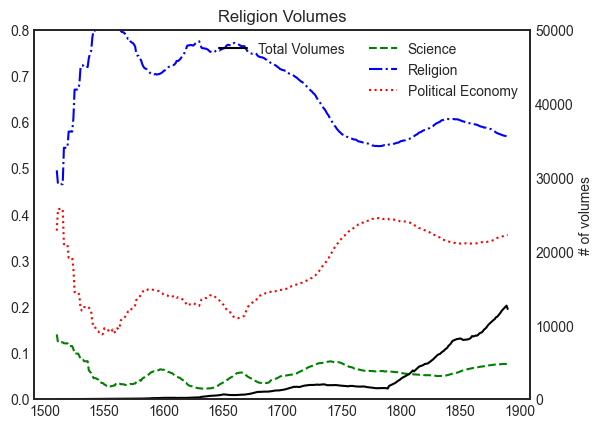

In [22]:

fig, (ax1) = plt.subplots(1,1)
ax1.plot(rel_time.columns, rel_time.iloc[0], color='g', label = 'Science', linestyle = 'dashed')
ax1.plot(rel_time.columns, rel_time.iloc[1], color='b', label = 'Religion', linestyle = 'dashdot')
ax1.plot(rel_time.columns, rel_time.iloc[2], color='r', label = 'Political Economy', linestyle = 'dotted')
ax1.legend(loc='upper right')
plt.ylim([0,0.8])
ax1.title.set_text('Religion Volumes')

ax2 = ax1.twinx()
ax2.set_ylabel('# of volumes')
ax2.plot(rel_time.columns, rel_time.iloc[3], color='black', label = 'Total Volumes')
ax2.legend(loc='upper center')
plt.ylim([0,50000])
fig.savefig('./Volumes/Religion.png', dpi = 200)
# plt.savefig('./Volumes_Ali/Religion.eps', format='eps')

# Find Total Volumes per Year, Moving Average

In [48]:
tot_sci = {}
tot_pol = {}
tot_rel = {}
tot_vol = {}
for year in years:
    d = volume_weights[(volume_weights['Year_rounded'] >= (year-10)) & (volume_weights['Year_rounded'] <= (year+10))].drop(columns=['Year_rounded'])

    #Including all options, as above, for completeness
    r = d['Religion'].sum()
    s = d['Science'].sum()
    p = d['Politics'].sum()
    N = len(d['Science']) #Will be same for all three categories
    if N > 0:
        tot_sci[year] = s/N
        tot_rel[year] = r/N
        tot_pol[year] = p/N 
        tot_vol[year] = N
    else:
        tot_sci[year] = np.NaN
        tot_rel[year] = np.NaN
        tot_pol[year] = np.NaN
        tot_vol[year] = np.NaN
    

In [49]:
tot_time = pd.DataFrame({'Science':pd.Series(tot_sci), 'Religion':pd.Series(tot_rel), 'Politics':pd.Series(tot_pol), 'Volumes':pd.Series(tot_vol)})
tot_time = tot_time.transpose()

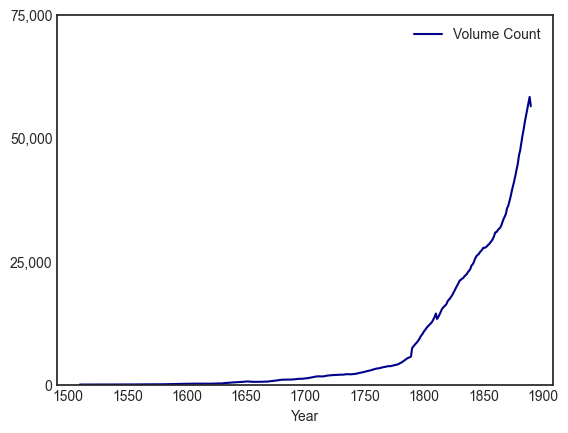

In [50]:
fig, (ax1) = plt.subplots(1,1)
ax1.plot(tot_time.columns, tot_time.iloc[3], color = "darkblue", label = "Volume Count")
ax1.legend(loc = "upper right")
ax1.set_xlabel('Year')
ax1.set_yticks([0,25000, 50000, 75000])
ax1.set_yticklabels(["0", "25,000", "50,000", "75,000"])
plt.ylim([0,75000])
fig.savefig('./Volumes/Total_Volumes.png', dpi = 200)



# #Uncomment to make full plots like above
# fig, (ax1) = plt.subplots(1,1)

# ax1.plot(tot_time.columns, tot_time.iloc[0], color='g', label = 'Science')
# ax1.plot(tot_time.columns, tot_time.iloc[1], color='b', label = 'Religion')
# ax1.plot(tot_time.columns, tot_time.iloc[2], color='r', label = 'Political Economy')
# ax1.legend(loc='upper right')
# plt.ylim([0,0.8])
# ax1.title.set_text('Religion Volumes')

# ax2 = ax1.twinx()
# ax2.set_ylabel('# of volumes')
# ax2.plot(tot_time.columns, tot_time.iloc[3], color='black', label = 'Total Volumes')
# ax2.legend(loc='upper center')
# plt.ylim([0,8000])
# fig.savefig('./Volumes/Total.png')
# # plt.savefig('./Volumes_Ali/Religion.eps', format='eps')